Machine Learning Using 'Forest Cover Type Dataset of Tree types found in the Roosevelt National Forest in Colorado'

Scrubbing Worksheet by Megan Gray

https://www.kaggle.com/uciml/forest-cover-type-dataset

https://www.kaggle.com/uciml/forest-cover-type-dataset#covtype.csv

API Command to covtype.csv file: kaggle datasets download -d uciml/forest-cover-type-dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, auc

import os
import time
import sys

### Load and Explore dataset provided by Kaggle Dataset or UCIML

In [2]:
file = pd.read_csv("Data/covtype.csv")

In [3]:
pd.set_option('display.max_columns', 500)

In [4]:
df = file

In [5]:
df[39:42]

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
39,2686,354,12,0,0,3167,200,219,157,6155,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5
40,2699,347,3,0,0,2096,213,234,159,6853,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
41,2570,346,2,0,0,331,215,235,158,5745,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2


In [6]:
df.shape

(581012, 55)

In [7]:
df.Cover_Type.value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

below section is for removing 'cover types' errors in 'TypeSoil' and SoilType columns from df.

In [8]:
df.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


In [9]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,0.448865,0.051434,0.436074,0.063627,0.005217,0.012952,0.008301,0.021335,0.002749,0.011316,0.000181,0.000308,0.001974,0.056168,0.021359,0.051584,0.030001,0.001031,0.000005,0.004897,0.005890,0.003268,0.006921,0.015936,0.001442,0.057439,0.099399,0.036622,0.000816,0.004456,0.001869,0.001628,0.198356,0.051927,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,0.497379,0.220882,0.495897,0.244087,0.072039,0.113066,0.090731,0.144499,0.052356,0.105775,0.013442,0.017550,0.044387,0.230245,0.144579,0.221186,0.170590,0.032092,0.002272,0.069804,0.076518,0.057077,0.082902,0.125228,0.037950,0.232681,0.299197,0.187833,0.028551,0.066605,0.043193,0.040318,0.398762,0.221879,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [10]:
df.dtypes

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                            int64
Soil_Type9                      

### Groupby Soil_Type

Due to the sheer number of soil types - I will need to group the soil types based on common characteristics in order to begin with a simpler model. According to the specifications of soil type, most of the soils are considered rocky/stony or other (non-specified, alluvium, or mixed sedmientary)

#### Ready Soil-Types Dataset

In [43]:
info_df = pd.read_csv("Data/Soil-types.csv", index_col=False)

In [44]:
info_df

,Soil_Type,code,family,sub-family,description,climatic zone,geologic zone
0,1,2702,Cathedral,NaN,extremely stony,lower montane,igneous and metamorphic
1,2,2703,Vanet,Ratake,very stony,lower montane,igneous and metamorphic
2,3,2704,Haploborolis,NaN,rubbly,lower montane,igneous and metamorphic
3,4,2705,Ratake,NaN,rubbly,lower montane,igneous and metamorphic
4,5,2706,Vanet,NaN,rubbly,lower montane,igneous and metamorphic
5,6,2717,Vanet,Wetmore,stony,lower montane,igneous and metamorphic
6,7,3501,Gothic,NaN,alluvium,montane dry,mixed sedimentary
7,8,3502,Supervisor,Limber,NaN,montane dry,mixed sedimentary
8,9,4201,Troutville,NaN,very stony,montane,glacial
9,10,4703,Bullwark,Catamount,rubbly,montane,igneous and metamorphic


#### TESTING

In [13]:
# generate a test dataset
soil = {'row1': [1, 0, 0], 'row2': [0, 0, 1], 'row3': [1, 0, 0]}
soilDf = pd.DataFrame.from_dict(soil, columns=['SoilType_1','SoilType_2','SoilType_3'], orient='index')

# create a new grouped col to work with
soilDf['soilGroup'] = ''

# loop through each row
for index, row in soilDf.iterrows():
   print('current row: ' + str(index))

   # for each column
   for col in soilDf.columns:

       # print basics
       print(col)
       print (getattr(row, col))

       # if our row/col element has a 1, then assign that
       if getattr(row, col) == 1:

           # Assign a number here (to join back on below)  or can lookup
           print('Assign ' + col)
           soilDf.at[index, 'soilGroup'] = col.replace("SoilType_", "")

   print('\n')

# print
soilDf

current row: row1
SoilType_1
1
Assign SoilType_1
SoilType_2
0
SoilType_3
0
soilGroup



current row: row2
SoilType_1
0
SoilType_2
0
SoilType_3
1
Assign SoilType_3
soilGroup



current row: row3
SoilType_1
1
Assign SoilType_1
SoilType_2
0
SoilType_3
0
soilGroup





,SoilType_1,SoilType_2,SoilType_3,soilGroup
row1,1,0,0,1
row2,0,0,1,3
row3,1,0,0,1


In [181]:
soilsDF = df

In [183]:
# create a new grouped col to work with
soilsDF['SoilType'] = ''

# loop through each row
for index, row in soilsDF.iterrows():
#    print('current row: ' + str(index))

    # for each column
    for col in soilsDF.columns:

        # print basics
        #        print(col)
        #        print (getattr(row, col))

        if "Soil_Type" in col:
            #print(col)

        # if our row/col element has a 1, then assign that
            if getattr(row, col) == 1:
                soilsDF.at[index, 'SoilType'] = col.replace("Soil_Type", "")
               # Assign a number here (to join back on below)  or can lookup
                #            print('Assign ' + col)
                   

#    print('\n')

# print
soilsDF.head(5)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,SoilType
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,29
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,29
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,12
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,30
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,29


Once summary soil column is created you can now sort according to type and reassign values to one or other soils category.

In [184]:
soilsDF[39:42]

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,SoilType
39,2686,354,12,0,0,3167,200,219,157,6155,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,30
40,2699,347,3,0,0,2096,213,234,159,6853,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,20
41,2570,346,2,0,0,331,215,235,158,5745,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,29


In [185]:
# Now drop Soil_Type## Columns in order to make it easier to view and work with dataframe
drop_soilsDF = soilsDF.drop(columns=[
    "Soil_Type1", "Soil_Type2", "Soil_Type3","Soil_Type4","Soil_Type5","Soil_Type6","Soil_Type7","Soil_Type8","Soil_Type9","Soil_Type10",
    "Soil_Type11","Soil_Type12","Soil_Type13","Soil_Type14","Soil_Type15","Soil_Type16","Soil_Type17","Soil_Type18","Soil_Type19","Soil_Type20",
    "Soil_Type21", "Soil_Type22", "Soil_Type23","Soil_Type24","Soil_Type25","Soil_Type26","Soil_Type27","Soil_Type28","Soil_Type29","Soil_Type30",
    "Soil_Type31","Soil_Type32","Soil_Type33","Soil_Type34","Soil_Type35","Soil_Type36","Soil_Type37","Soil_Type38","Soil_Type39","Soil_Type40"
])

In [186]:
drop_soilsDF.head(3)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Cover_Type,SoilType
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,5,29
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,5,29
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,2,12


In [187]:
drop_soilsDF.shape

(581012, 16)

In [188]:
drop_soilsDF.dtypes

Elevation                              int64
Aspect                                 int64
Slope                                  int64
Horizontal_Distance_To_Hydrology       int64
Vertical_Distance_To_Hydrology         int64
Horizontal_Distance_To_Roadways        int64
Hillshade_9am                          int64
Hillshade_Noon                         int64
Hillshade_3pm                          int64
Horizontal_Distance_To_Fire_Points     int64
Wilderness_Area1                       int64
Wilderness_Area2                       int64
Wilderness_Area3                       int64
Wilderness_Area4                       int64
Cover_Type                             int64
SoilType                              object
dtype: object

In [189]:
sortSoils = drop_soilsDF.SoilType.value_counts()

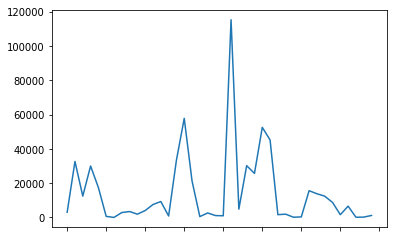

In [190]:
sortSoils.sort_index().plot()

In [191]:
# convert 'SoilType' column to numeric from object and rename column to 'Soil_Type' in order to properly join with 
# info_DF dataframe.
drop_soilsDF["Soil_Type"] = pd.to_numeric(drop_soilsDF.SoilType, errors="skip")

In [192]:
drop_soilsDF.shape

(581012, 17)

In [193]:
drop_soilsDF.dtypes

Elevation                              int64
Aspect                                 int64
Slope                                  int64
Horizontal_Distance_To_Hydrology       int64
Vertical_Distance_To_Hydrology         int64
Horizontal_Distance_To_Roadways        int64
Hillshade_9am                          int64
Hillshade_Noon                         int64
Hillshade_3pm                          int64
Horizontal_Distance_To_Fire_Points     int64
Wilderness_Area1                       int64
Wilderness_Area2                       int64
Wilderness_Area3                       int64
Wilderness_Area4                       int64
Cover_Type                             int64
SoilType                              object
Soil_Type                              int64
dtype: object

In [194]:
info_df.dtypes

Soil_Type         int64
code              int64
family           object
sub-family       object
description      object
climatic zone    object
geologic zone    object
dtype: object

In [195]:
info_df.tail()

,Soil_Type,code,family,sub-family,description,climatic zone,geologic zone
35,36,8707,Bross,Cryumbrepts,extremely stony,alpine,igneous and metamorphic
36,37,8708,Cryumbrepts,Cryorthents,extremely stony,alpine,igneous and metamorphic
37,38,8771,Leighcan,Moran - Cryaquolls,extremely stony,alpine,igneous and metamorphic
38,39,8772,Moran,Cryorthents,extremely stony,alpine,igneous and metamorphic
39,40,8776,Moran,Cryorthents,extremely stony,alpine,igneous and metamorphic


In [198]:
#join_soilsDF = drop_soilsDF.join(info_df, on="Soil_Type")
# join_soilsDF = drop_soilsDF.join(info_df, on="Soil_Type", how="inner")
soilsCovDF = drop_soilsDF.merge(info_df, on='Soil_Type', how='inner')
soilsCovDF.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Cover_Type,SoilType,Soil_Type,code,family,sub-family,description,climatic zone,geologic zone
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,5,29,29,7745,Como,Legault,extremely stony,subalpine,igneous and metamorphic
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,5,29,29,7745,Como,Legault,extremely stony,subalpine,igneous and metamorphic
2,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,5,29,29,7745,Como,Legault,extremely stony,subalpine,igneous and metamorphic
3,2579,132,6,300,-15,67,230,237,140,6031,1,0,0,0,2,29,29,7745,Como,Legault,extremely stony,subalpine,igneous and metamorphic
4,2606,45,7,270,5,633,222,225,138,6256,1,0,0,0,5,29,29,7745,Como,Legault,extremely stony,subalpine,igneous and metamorphic


In [ ]:
# once soil_types are assigned to geologic zone types you can then assign value for base soil types of 0 or 1 
# (non-rocky = 0, rocky = 1)

In [199]:
GeoSoils_mask = soilsCovDF['geologic zone'] == 'igneous and metamorphic'
soilsCovDF['GeoSoils'] = np.where(GeoSoils_mask, '1', '0')
soilsCovDF

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Cover_Type,SoilType,Soil_Type,code,family,sub-family,description,climatic zone,geologic zone,GeoSoils
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,5,29,29,7745,Como,Legault,extremely stony,subalpine,igneous and metamorphic,1
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,5,29,29,7745,Como,Legault,extremely stony,subalpine,igneous and metamorphic,1
2,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,5,29,29,7745,Como,Legault,extremely stony,subalpine,igneous and metamorphic,1
3,2579,132,6,300,-15,67,230,237,140,6031,1,0,0,0,2,29,29,7745,Como,Legault,extremely stony,subalpine,igneous and metamorphic,1
4,2606,45,7,270,5,633,222,225,138,6256,1,0,0,0,5,29,29,7745,Como,Legault,extremely stony,subalpine,igneous and metamorphic,1
5,2605,49,4,234,7,573,222,230,144,6228,1,0,0,0,5,29,29,7745,Como,Legault,extremely stony,subalpine,igneous and metamorphic,1
6,2617,45,9,240,56,666,223,221,133,6244,1,0,0,0,5,29,29,7745,Como,Legault,extremely stony,subalpine,igneous and metamorphic,1
7,2612,59,10,247,11,636,228,219,124,6230,1,0,0,0,5,29,29,7745,Como,Legault,extremely stony,subalpine,igneous and metamorphic,1
8,2610,259,1,120,-1,607,216,239,161,6096,1,0,0,0,5,29,29,7745,Como,Legault,extremely stony,subalpine,igneous and metamorphic,1
9,2962,148,16,323,23,5916,240,236,120,3395,1,0,0,0,2,29,29,7745,Como,Legault,extremely stony,subalpine,igneous and metamorphic,1


In [200]:
soilsCovDF.dtypes

Elevation                              int64
Aspect                                 int64
Slope                                  int64
Horizontal_Distance_To_Hydrology       int64
Vertical_Distance_To_Hydrology         int64
Horizontal_Distance_To_Roadways        int64
Hillshade_9am                          int64
Hillshade_Noon                         int64
Hillshade_3pm                          int64
Horizontal_Distance_To_Fire_Points     int64
Wilderness_Area1                       int64
Wilderness_Area2                       int64
Wilderness_Area3                       int64
Wilderness_Area4                       int64
Cover_Type                             int64
SoilType                              object
Soil_Type                              int64
code                                   int64
family                                object
sub-family                            object
description                           object
climatic zone                         object
geologic z

In [202]:
soilsCovDF.drop(columns=["SoilType", "code", "family", "sub-family", "description", "climatic zone"]).head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Cover_Type,Soil_Type,geologic zone,GeoSoils
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,5,29,igneous and metamorphic,1
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,5,29,igneous and metamorphic,1
2,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,5,29,igneous and metamorphic,1
3,2579,132,6,300,-15,67,230,237,140,6031,1,0,0,0,2,29,igneous and metamorphic,1
4,2606,45,7,270,5,633,222,225,138,6256,1,0,0,0,5,29,igneous and metamorphic,1


In [203]:
soilsCovDF.to_csv("Data/soilsCovtype.csv", index=False)